## Challenge: What test to use

Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

Here is the data file. And here is the codebook, with information about the variable coding and content.

In this dataset, the same participants answered questions in 2012 and again 2014.

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
3. Who reported watching more TV in 2012, men or women?
4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [1]:
#Import modules
import numpy as np
import pandas as pd
import sklearn
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt

import seaborn as sns
import math

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import io
import requests

import pylab

In [2]:
df = pd.read_csv(("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv"))

In [3]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


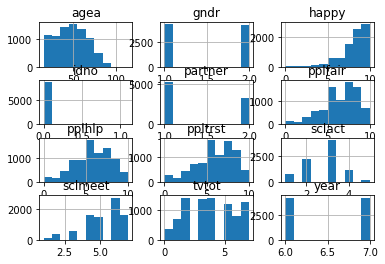

In [4]:
df.hist()

plt.show()

In [5]:
df.isnull().sum()

cntry        0
idno         0
year         0
tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64

In [6]:
df.fillna(inplace=True,method='ffill')

df.isnull().sum()

cntry      0
idno       0
year       0
tvtot      0
ppltrst    0
pplfair    0
pplhlp     0
happy      0
sclmeet    0
sclact     0
gndr       0
agea       0
partner    0
dtype: int64

In [ ]:
# df = df.dropna()
# df.isnull().sum()

In [8]:
df.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.594000e+03,8594.000000,8594.000000,8594.00000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000
mean,3.954938e+04,6.500000,3.862928,5.55818,6.002094,5.318013,7.694322,5.192343,2.749476,1.496858,47.635094,1.384687
std,6.267259e+05,0.500029,2.019760,2.23587,2.130447,2.173812,1.735172,1.459052,0.905112,0.500019,18.421901,0.486550
min,1.000000e+00,6.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.052000e+03,6.000000,2.000000,4.00000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.714000e+03,6.500000,4.000000,6.00000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.745000e+03,7.000000,5.000000,7.00000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,62.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.00000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8594 non-null float64
ppltrst    8594 non-null float64
pplfair    8594 non-null float64
pplhlp     8594 non-null float64
happy      8594 non-null float64
sclmeet    8594 non-null float64
sclact     8594 non-null float64
gndr       8594 non-null float64
agea       8594 non-null float64
partner    8594 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 872.9+ KB


#### Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [10]:
#Where year = 6, year = 2012. Where year = 7, year = 2014. 

df6 = df.loc[df['year'] ==6]
df7 = df.loc[df['year'] ==7]


df2012 = df6.groupby(df6['cntry'])['ppltrst'].mean()
df2014 = df7.groupby(df7['cntry'])['ppltrst'].mean()

print(df2012)
print(df2014)
print(stats.kstest(df2012, 'norm'))
print(stats.kstest(df2014, 'norm'))

cntry
CH    5.677878
CZ    4.351064
DE    5.214286
ES    5.114592
NO    6.651163
SE    6.059471
Name: ppltrst, dtype: float64
cntry
CH    5.751617
CZ    4.424012
DE    5.357143
ES    4.893652
NO    6.599179
SE    6.257709
Name: ppltrst, dtype: float64
KstestResult(statistic=0.9999932260698766, pvalue=1.9322987361189162e-31)
KstestResult(statistic=0.9999951557717885, pvalue=2.584506108635491e-32)


In [11]:
stats.wilcoxon(df2012,df2014)

WilcoxonResult(statistic=7.0, pvalue=0.463071015014588)

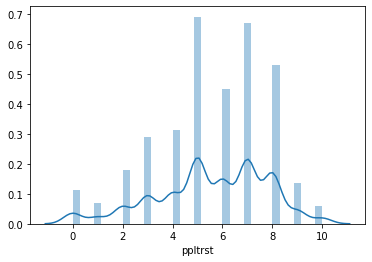

In [12]:
sns.distplot(df.ppltrst.dropna())
plt.show()

#### Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [13]:
for unique in df6.cntry.unique():
    cntry = unique
    data_to_use = df6[df6['cntry'] == cntry]
    print(stats.kstest(data_to_use['happy'],'norm'))

    

KstestResult(statistic=0.9934754577251617, pvalue=0.0)
KstestResult(statistic=0.9682549651902544, pvalue=0.0)
KstestResult(statistic=0.9999683287581669, pvalue=2.043343072951399e-63)
KstestResult(statistic=0.9763912396435553, pvalue=0.0)
KstestResult(statistic=0.9931781457440196, pvalue=0.0)
KstestResult(statistic=0.9931434940388545, pvalue=0.0)


In [14]:
for unique in df6.cntry.unique():
    cntry = unique
    data_to_use2012 = df6[df6['cntry'] == cntry]
    for unique2 in df7.cntry.unique():
        if unique2 == unique:
            cntry2 = unique2
            data_to_use2014 = df7[df7['cntry']==cntry]
            print(cntry, stats.wilcoxon(data_to_use2012['happy'], data_to_use2014['happy']))

CH WilcoxonResult(statistic=93043.5, pvalue=0.9182815996614322)
CZ WilcoxonResult(statistic=78569.0, pvalue=0.2545298863954758)
DE WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)
ES WilcoxonResult(statistic=232447.5, pvalue=0.055803287639812287)
NO WilcoxonResult(statistic=68447.5, pvalue=1.0142278074830803e-05)
SE WilcoxonResult(statistic=126903.5, pvalue=0.6938040837018453)


#### Who reported watching more TV in 2012, men or women?

In [15]:
for unique in df6.gndr.unique():
    gndr = unique
    data_to_use = df6[df6['gndr'] == gndr]
    print(stats.kstest(data_to_use['tvtot'],'norm'))

men = df6[df6['gndr']==1]
women = df6[df6['gndr']==2]
print(stats.mannwhitneyu(men['tvtot'],women['tvtot'],alternative='less'))
    

KstestResult(statistic=0.854058080837635, pvalue=0.0)
KstestResult(statistic=0.8616509822579489, pvalue=0.0)
MannwhitneyuResult(statistic=2279328.0, pvalue=0.23796364318747015)


#### Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?


In [16]:
print(stats.kstest(df6['pplfair'], 'norm'))


print(stats.mannwhitneyu(df6['partner']==1, df6['partner']==2))

KstestResult(statistic=0.9418763516450254, pvalue=0.0)
MannwhitneyuResult(statistic=6952546.0, pvalue=3.006053690340869e-116)


#### Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?


In [18]:
CH = df7[df7['cntry']=='CH']
DE = df7[df7['cntry']=='DE'] 
ES = df7[df7['cntry']=='ES']
SE = df7[df7['cntry']=='SE']

CH = CH.sclact
DE = DE.sclact
ES = ES.sclact
SE = SE.sclact

print('CH KStest: ', stats.kstest([CH], 'norm'))
print('DE KStest: ', stats.kstest([DE], 'norm'))
print('ES KStest: ', stats.kstest([ES], 'norm'))
print('SE KStest: ', stats.kstest([SE], 'norm'))

#getting nan for stat...come back to
#ok fixed issue

# Trying with Median Test
print('Median Test: ', stats.median_test(CH,DE, ES, SE))

CH KStest:  KstestResult(statistic=0.9999997133484281, pvalue=5.733031438470704e-07)
DE KStest:  KstestResult(statistic=0.9999683287581669, pvalue=6.334248366623996e-05)
ES KStest:  KstestResult(statistic=0.9999997133484281, pvalue=5.733031438470704e-07)
SE KStest:  KstestResult(statistic=0.9999997133484281, pvalue=5.733031438470704e-07)
Median Test:  (15.774872257127655, 0.0012610863417217995, 3.0, array([[ 145,    1,  180,  192],
       [ 628,   13, 1033,  716]], dtype=int64))


In [19]:
df.agea.unique()

array([ 60.,  59.,  24.,  64.,  55.,  76.,  30.,  84.,  62.,  33.,  40.,
        69.,  32.,  70.,  61.,  21.,  36.,  51.,  25.,  20.,  22.,  35.,
        26.,  54.,  38.,  82.,  53.,  46.,  47.,  72.,  16.,  42.,  57.,
        45.,  28.,  85.,  48.,  52.,  29.,  27.,  79.,  44.,  92.,  50.,
        37.,  75.,  19.,  31.,  65.,  68.,  58.,  39.,  67.,  23.,  56.,
        78.,  83.,  74.,  49.,  43.,  86.,  91.,  34.,  17.,  41.,  63.,
        73.,  80.,  81.,  71.,  89.,  18.,  94.,  87.,  90.,  15., 103.,
        95.,  97.,  93., 101.,  96., 114.])

#### Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [24]:
#sort by country
CH = df7[df7['cntry']=='CH']
DE = df7[df7['cntry']=='DE'] 
ES = df7[df7['cntry']=='ES']
SE = df7[df7['cntry']=='SE']

#sort by age
CH_65Plus  = CH[CH['agea']>64]
DE_65Plus = DE[DE['agea']>64]
ES_65Plus = ES[ES['agea']>64]
SE_65Plus = SE[SE['agea']>64]

#pull social activity
CH_65Plus = CH_65Plus.sclact
DE_65Plus = DE_65Plus.sclact 
ES_65Plus = ES_65Plus.sclact
SE_65Plus = SE_65Plus.sclact 


print(CH_65Plus.shape, DE_65Plus.shape, ES_65Plus.shape, SE_65Plus.shape)

stats.median_test(CH_65Plus, DE_65Plus, ES_65Plus, SE_65Plus)

(147,) (6,) (243,) (263,)


(8.054778063040152, 0.044893070455521156, 3.0, array([[ 35,   0,  35,  57],
        [112,   6, 208, 206]], dtype=int64))